<a href="https://colab.research.google.com/github/anaruizn/M-todo-Montecarlo/blob/main/Trabajo_1-ProyectoMontecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='cyan'>**Tarea computacional #2: Proyecto Montecarlo**</font>

## *Presentado por:*
## <font color='magenta'>Ana Luz Ruiz Noriega</font>

Se implementa un código en Python que emplea el algoritmo de Metrópolis para calcular las probabilidades de que un fotón sea absorbido, reflejado o transmitido al interactuar con el átomo de un metal. Además, también brinda información acerca de la emisión de los fotoelectrones.

In [30]:
#Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt

# <font color='Red'>**Explicación**</font>

Se implementa el algoritmo de Metrópolis para evaluar la emisión fotoeléctrica en distintos metales al ser iluminados por fotones con diversas energías, esto, haciendo incidir fotones en un rango de frecuencias determinado.

Para definir la distribución de energías de los fotones incidentes, se tiene en cuenta que la energía de dichos fotones es $E = hν$. Por otra parte, dado que los electrones siguen la distribución de Fermi-Dirac, la probabilidad de encontrar un electrón con energía $E$ está dada por:

$f(E)=\frac{1}{e^{(E-E_F)/k_{B}T}+1}$ ,

donde $E_F$ es la energía de Fermi y $T$ es la temperatura.

Para determinar la emisión de un electrón, se considera la función de trabajo $\phi$ de cada material. De este modo, los valores reportados en la literatura son empleados para determinar el valor de $\phi$ en cada caso. Teniendo en cuenta lo anterior, un electrón solo puede ser emitido si: $E_{fotón}+E_{electrón}>\phi$



En este sentido, se implementa un código basado en el algoritmo de Metrópolis para calcular las probabilidades asociadas a la fotoemisión, absorción, reflectancia y transmitancia para diferentes metales en los siguientes casos:

### <font color='Green'>**Caso 1:**</font> Fotones que incide en un átomo.

Inicialmente se recorre cada metal y se obtiene su función de trabajo, así, para cada energía de fotón:

Se selecciona una energía aleatoria $E_{electrón}$ en el intervalo $[0,E_F]$.

1. Se evalúa la función de Fermi-Dirac, es decir, la probabilidad de que un estado con energía $E_{electrón}$​ esté ocupado a una temperatura $T$.

2. Se genera un número aleatorio entre 0 y 1.
  * Si el número es menor que la probabilidad $P$ de ocupación de un estado con energía, se acepta que el estado está ocupado y el electrón absorbe el fotón.
      * Si no, se considera que el fotón ha sido reflejado.
  * Si el electrón ha sido excitado, se verifica si su energía total después de absorber el fotón $E_{electrón}+E_{fotón}​$ es mayor que la función de trabajo $\phi$.
      * Si esta condición se cumple, el electrón es emitido (efecto fotoeléctrico).
      * Si no, se considera que el fotón ha sido transmitido dentro del material sin que ocurra emisión.

Por último, se cuentan los eventos y se normalizan con respecto al número total de iteraciones.

### <font color='Green'>**Caso 2:**</font> Fotones incidentes en una cadena de tres átomos.
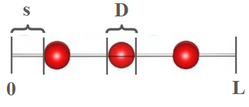

En cada iteración para un fotón de una energía dada,

1. Se selecciona una posición aleatoria para el fotón dentro de la estructura del material ($L=4S+3D$), por lo que:
  * Se genera una posición aleatoria $x_{fotón}$ entre 0 y $L$
2. Se selecciona una energía aleatoria para el electrón dentro del intervalo $[0,E_F]$ y se evalúa la probabilidad de ocupación de Fermi-Dirac
3. Se determina si el fotón interactúa con un átomo, esto es, se verifica si $x_fotón$ cae en el intervalo de un átomo.
4. Se decide el resultado de la interacción:
   * Si no hay interacción, el fotón es contado como transmitido y no interactuó.
   * Si hay interacción:
        * con probabilidad $P$, el electrón absorbe el fotón.
             * Si la energía total $E_{fotón}+E_{electrón}$ es mayor que $\phi$, el electrón es emitido.
        * Si no, el fotón es transmitido.
        * Si el electrón no absorbe el fotón, este es reflejado.

Por último, se cuentan los eventos y se normalizan con respecto al número total de iteraciones.



In [31]:
# Definimos las constantes
h = 6.626e-34  # Constante de Planck (J·s)
c = 3.0e8       # Velocidad de la luz (m/s)
k_B = 1.38e-23  # Constante de Boltzmann (J/K)
eV_to_J = 1.602e-19  # Conversión de eV a J

In [32]:
# Fijamos los parámetros para la simulación
T = 300  # Temperatura del sistema en Kelvin
E_F = 5.5 * eV_to_J  # Energía de Fermi típica (en J)
n_iter = 100000  # Número de iteraciones

In [33]:
# Definimos el rango de energía de los fotones incidentes en eV
frecuencias = np.linspace(2e14, 1e15, 100)  # Frecuencias en Hz
energias_foton = h * frecuencias / eV_to_J  # Energías en eV

"""
Aquí tomamos 100 fotones con frecuencias aleatorias en el rago 2e14 Hz - 1e15 Hz, correspondientes al rango desde el infrarojo cercano
hasta el visible (acercandonos al ultravioleta), y calculamos la correspondiente energía en eV.
"""

'\nAquí tomamos 100 fotones con frecuencias aleatorias en el rago 2e14 Hz - 1e15 Hz, correspondientes al rango desde el infrarojo cercano \nhasta el visible (acercandonos al ultravioleta), y calculamos la correspondiente energía en eV.\n'

In [34]:
# Definimos la función de distribución de Fermi-Dirac para establecer la distribución de los electrones.
def fermi_dirac(E, T):
    return 1 / (np.exp((E - E_F) / (k_B * T)) + 1)

# <font color='purpose'>**1. Interacción de un fotón con un átomo.**</font>

In [35]:
# Definimos el valor de la función de trabajo (en eV) para cada metal
metales = {
    "Aluminio": 4.28,
    "Cobre": 4.7,
    "Oro": 5.1,
    "Plata": 4.73,
    "Hierro": 4.5
}

In [36]:
# Algoritmo de Metrópolis para cada metal
"""""""""""""""""""""""""""""
Como primer paso para el desarrollo del algoritmo, creamos diccionarios vacíos para almacenar los datos de cada metal y recorremos el diccionario *metales*
para definir la energía mínima necesaria para extraer un electrón del material. A continuación, para cada energía de fotón: se ejecuta un ciclo de Montecarlo
(con n_iter interacciones), se selecciona un electrón con energía aleatoria y se evalúa si está ocupado (Fermi-Dirac), si está ocupado, el fotón se absorbe y
se evalúa si emite un electrón. Si no se emite, el fotón se considera transmitido y si el electrón estaba desocupado, el fotón se refleja. Por último, almacenamos
las fracciones de absorción, reflexión, transmisión y emisión (para cada energía y metal).

"""""""""""""""""""""""""""""
resultados = {}  # Guardará el número de electrones emitidos por cada metal.
absorbidos = {}  # Guardará el número de electrones absorbidos por cada metal.
reflejados = {}  # Guardará el número de electrones reflejados por cada metal.
transmitidos = {} # Guardará el número de electrones transimitidos por cada metal.
for metal, phi in metales.items():
    phi_J = phi * eV_to_J  # Convierte la función de trabajo de eV a Joules
    electrones_emitidos = np.zeros_like(energias_foton)  # Almacenará el número de emisiones generados por cada energía
    fotones_absorbidos = np.zeros_like(energias_foton)   # Almacenará el número de fotones absorbidos por cada energía
    fotones_reflejados = np.zeros_like(energias_foton)   # Almacenará el número de fotones reflejados por cada energía
    fotones_transmitidos = np.zeros_like(energias_foton) # Almacenará el número de fotones transmitidos por cada energía

    for i, E_foton in enumerate(energias_foton):   # Recorre todas las energías de los fotones
        aceptados = 0                # Se registran la cantidad de eventos para cada categoría iniciando los contadores en 0
        absorbidos_count = 0
        reflejados_count = 0
        transmitidos_count = 0

        for _ in range(n_iter):    # Se ejecuta el algoritmo n_iter veces para cada energía de fotón.
            E_electron = np.random.uniform(0, E_F)  # Genera una energía aleatoria dentro del rango [0, E_F]
            P = fermi_dirac(E_electron, T)    # Calcula la probabilidad de ocupación de un estado con energía E_electrón
            if np.random.rand() < P:          # Se genera un número aleatorio entre 0 y 1.
                absorbidos_count += 1
                if (E_foton * eV_to_J + E_electron > phi_J):  # Verifica si la energía total es mayor que la función de trabajo
                    aceptados += 1
                else:
                    transmitidos_count += 1
            else:
                reflejados_count += 1
# Normalizamos los conteos
        electrones_emitidos[i] = aceptados / n_iter
        fotones_absorbidos[i] = absorbidos_count / n_iter
        fotones_reflejados[i] = reflejados_count / n_iter
        fotones_transmitidos[i] = transmitidos_count / n_iter
# Guardamos los conteos normalizados en los diccionarios correspondientes
    resultados[metal] = electrones_emitidos
    absorbidos[metal] = fotones_absorbidos
    reflejados[metal] = fotones_reflejados
    transmitidos[metal] = fotones_transmitidos

In [37]:
# Comprobamos que la suma de los electrones emitidos + fotones reflejados + fotones transmitidos = 1
"""
Cabe acalar que el código toma todos los fotones como absorbidos aunque una fracción de ellos haya generado emisión, por esta razón, en lugar de sumar
electrones absorbidos + fotones reflejados + fotones transmitidos = 1, sumamos electrones emitidos + fotones reflejados + fotones transmitidos = 1.
"""
print(resultados["Aluminio"][0])
print(reflejados["Aluminio"][0])
print(transmitidos["Aluminio"][0])
print(transmitidos["Aluminio"][0]+reflejados["Aluminio"][0]+resultados["Aluminio"][0])

0.3705
0.00339
0.62611
1.0


In [38]:
# Fotones absorbidos + fotones reflejados = 1
"""
Los fotones absorbidos (aunque luego emitan o se transmitan) más los fotones reflejados deben sumar 1, conservando el número de fotones generados y comprobando que
no se hayan hecho dobles conteos.
"""
print(absorbidos["Aluminio"][0])
print(reflejados["Aluminio"][0])

0.99661
0.00339


In [39]:
# Definimos los colores para cada material
colores = ["blue", "red", "green", "purple", "orange"]


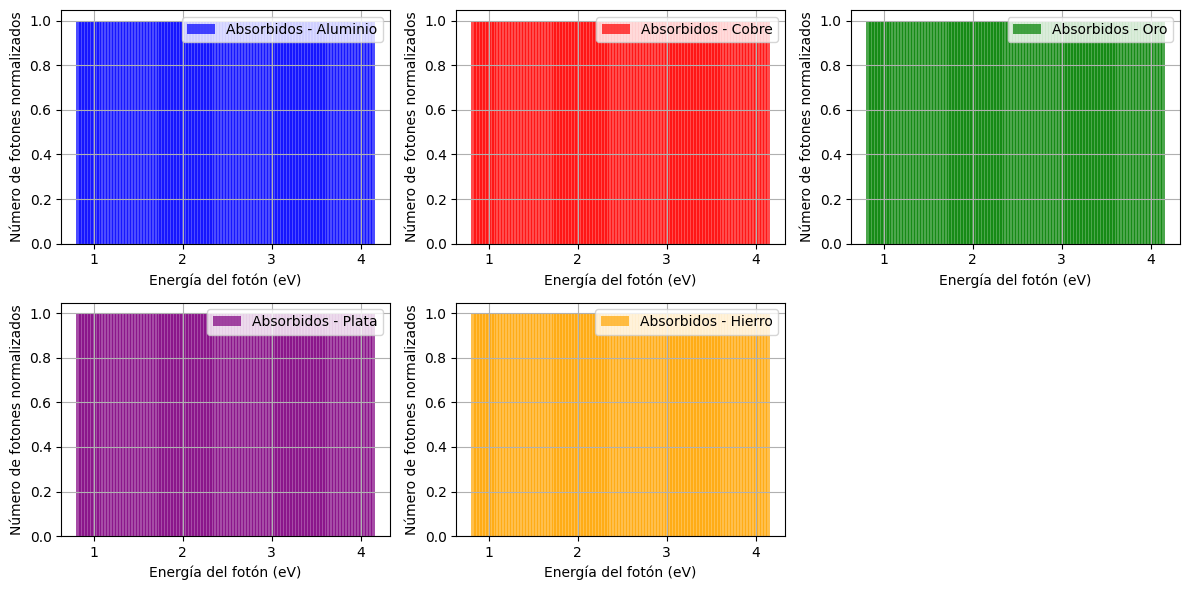

In [40]:
# Graficamos los fotones absorbidos para cada material en función de la energía de cada fotón
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

for i, (metal, phi) in enumerate(metales.items()):
    color = colores[i]
    axes[i].bar(energias_foton, absorbidos[metal], width=0.05, alpha=0.7, color=color, label=f"Absorbidos - {metal}")
    axes[i].set_xlabel("Energía del fotón (eV)")
    axes[i].set_ylabel("Número de fotones normalizados")
    axes[i].legend()
    axes[i].grid()
for ax in axes[len(metales):]:  # Elimina el subplot vacío
    fig.delaxes(ax)
plt.tight_layout()
plt.savefig("Caso1_fotones-absorbidos", dpi=500) # Descargamos las graficas
plt.show()

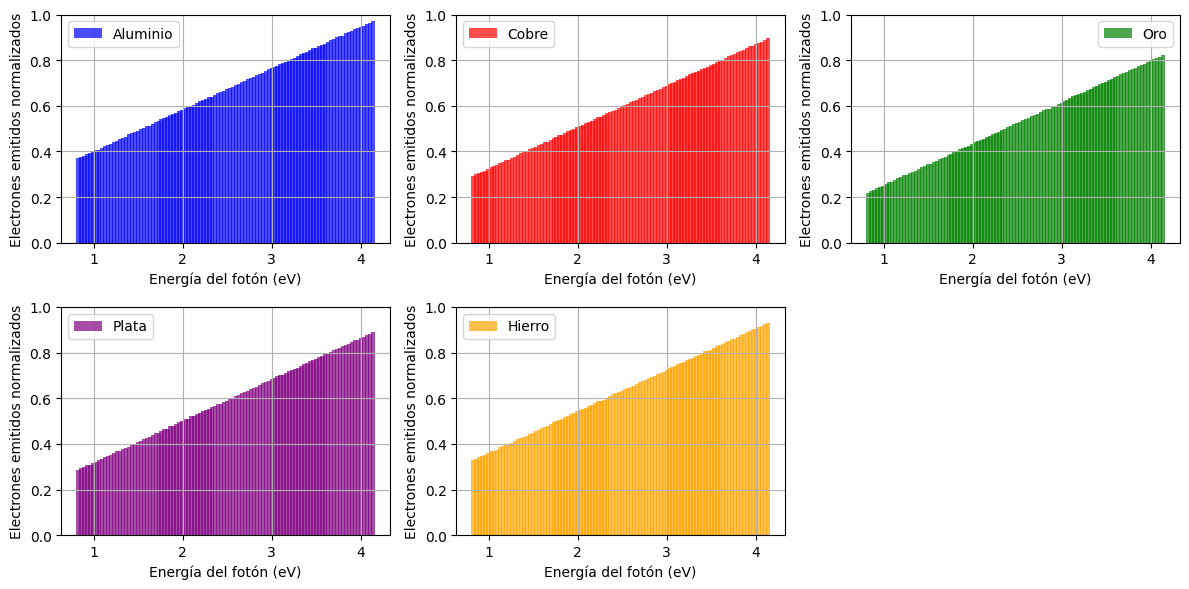

In [41]:
# Graficamos los electrones emitidos en función de la energía del fotón
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()
for ax, (metal, electrones), color in zip(axes[:len(resultados)], resultados.items(), colores):
    ax.bar(energias_foton, electrones, width=0.05, alpha=0.7, label=metal, color=color)
    ax.set_xlabel("Energía del fotón (eV)")
    ax.set_ylabel("Electrones emitidos normalizados")
    ax.set_ylim(0.0, 1.0)
    ax.legend()
    ax.grid()
for ax in axes[len(resultados):]:
    fig.delaxes(ax)
plt.tight_layout()
plt.savefig("Caso1_electrones-emitidos", dpi=500) # Descargamos las graficas
plt.show()

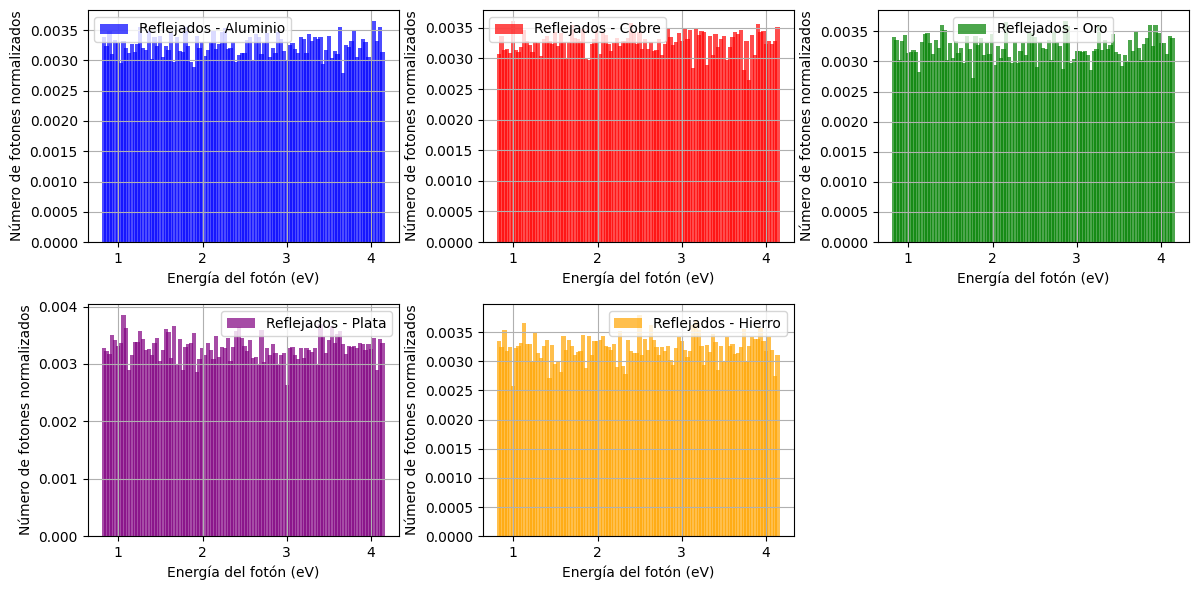

In [42]:
# Graficamos los fotones reflejados en función de la energía de cada fotón
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

for i, (metal, phi) in enumerate(metales.items()):
    color = colores[i]
    axes[i].bar(energias_foton, reflejados[metal], width=0.05, alpha=0.7, color=color, label=f"Reflejados - {metal}")
    axes[i].set_xlabel("Energía del fotón (eV)")
    axes[i].set_ylabel("Número de fotones normalizados")
    axes[i].legend()
    axes[i].grid()
for ax in axes[len(metales):]:
    fig.delaxes(ax)
plt.tight_layout()
plt.savefig("Caso1_fotones-reflejados", dpi=500) # Descargamos las graficas
plt.show()

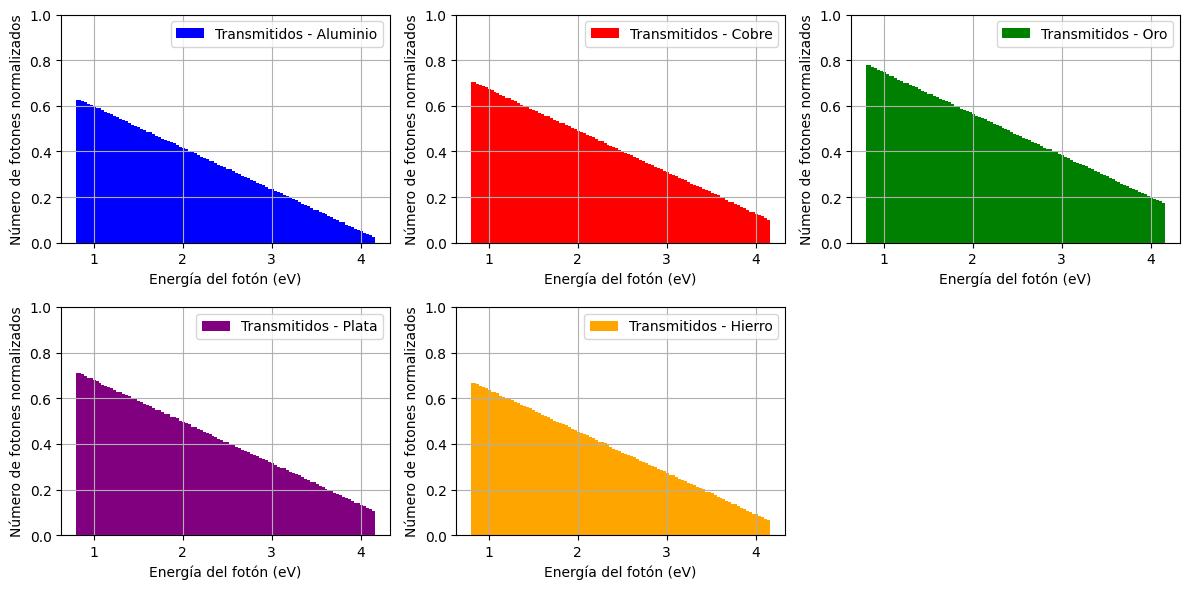

In [43]:
# Graficamos los fotones transmitidos en fución de la energía de cada fotón
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

for i, (metal, phi) in enumerate(metales.items()):
    color = colores[i]
    axes[i].bar(energias_foton, transmitidos[metal], width=0.05, color=color, label=f"Transmitidos - {metal}")
    axes[i].set_xlabel("Energía del fotón (eV)")
    axes[i].set_ylabel("Número de fotones normalizados")
    axes[i].set_ylim(0.0, 1.0)
    axes[i].legend()
    axes[i].grid()
for ax in axes[len(metales):]:
    fig.delaxes(ax)
plt.tight_layout()
plt.savefig("Caso1_electrones-transmitidos", dpi=500) # Descargamos las graficas
plt.show()

# <font color='purpose'>**2. Interacción de un fotón con una cadena de 3 átomos.**</font>

In [44]:
# Definimos los valores de la función de trabajo en eV para cada metal, diámetro atómico D (en metros) y separación interatómica (en metros)
metales = {
    "Aluminio": {"phi": 4.28, "D": 2*1.43e-10, "S": 2.86e-10},
    "Cobre": {"phi": 4.7, "D": 2*1.28e-10, "S": 2.55e-10},
    "Oro": {"phi": 5.1, "D": 2*1.44e-10, "S": 2.88e-10},
    "Plata": {"phi": 4.73, "D": 2*1.45e-10, "S": 2.90e-10},
    "Hierro": {"phi": 4.5, "D": 2*1.26e-10, "S": 2.52e-10}
}

In [45]:
# Aplicación del algoritmo de Metrópolis
resultados = {} # Guardará el número de electrones emitidos por cada metal.
absorbidos = {} # Guardará el número de fotones absorbidos por cada metal.
reflejados = {} # Guardará el número de fotones reflejados por cada metal.
transmitidos = {} # Guardará el número de fotones emitidos por cada metal.
interactuaron = {} # Guardará el número de fotones que interacturon por cada metal.
no_interactuaron = {} # Guardará el número de fotones aque no interactuaron por cada metal.

for metal, props in metales.items():  # Toma el nombre de cada metal y selecciona las propiedades asociadas a ese metal.
    phi_J = props["phi"] * eV_to_J  # Convierte los valores de la función de trabajo de eV a Joules
    D = props["D"]  # Asigna el valor del diámetro para cada metal
    S = props["S"]  # Asigna el valor de la distancia entre átomos para cada metal
    L = 4 * S + 3 * D  # Tamaño de la red en 1D con la disposición [SDSDSDS]

    electrones_emitidos = np.zeros_like(energias_foton)  # Almacenará la cantidad de electrones emitidos para cada energía de fotón
    fotones_absorbidos = np.zeros_like(energias_foton)   # Almacenerá la cantidad de fotones absorbidos para cada energía
    fotones_reflejados = np.zeros_like(energias_foton)   # Almacenerá la cantidad de fotones reflejados para cada energía
    fotones_transmitidos = np.zeros_like(energias_foton) # Almacenerá la cantidad de fotones transmitidos para cada energía
    contador_interactuaron = np.zeros_like(energias_foton)  # Contará cuántos fotones interactuaron con el material
    contador_no_interactuaron = np.zeros_like(energias_foton)  # Contará cuántos fotones no interactuaron con el material


    for i, E_foton in enumerate(energias_foton):  # Recorre todas las energías de los fotones
        aceptados = 0               #### Se registran la cantidad de eventos para cada categoría iniciando los contadores en 0 ####
        absorbidos_count = 0
        reflejados_count = 0
        transmitidos_count = 0
        interactuaron_count = 0
        no_interactuaron_count = 0

        for _ in range(n_iter):  # Se ejecuta el algoritmo n_iter veces para cada energía de fotón.
            pos_foton = np.random.uniform(0, L)  # Genera una posición aleatoria para el fotón dentro del rango [0, L]
            E_electron = np.random.uniform(0, E_F)  # Genera una energía aleatoria para el electrón en el rango [0, E_F]
            P = fermi_dirac(E_electron, T)  #  Calcula la probabilidad de ocupación de los estados electrónicos para un electrón.

      # Verificamos si el fotón interactúa con algún átomo respetando el arreglo [SDSDSDS]
            interaccion = False       # Si el fotón no interactúa con el átomo
            for j in range(3):
                x0 = S + j * (S + D)  # Calcula el inicio del intervalo del átomo
                if x0 <= pos_foton <= x0 + D:  # Verifica si la posición del fotón está dentro del intervalo del átomo
                    interaccion = True    # Si el fotón interactúa con el átomo
                    break
# Determinamos el tipo de interacción
            if interaccion:
                interactuaron_count += 1

                if np.random.rand() < P:
                    absorbidos_count += 1
                    if (E_foton * eV_to_J + E_electron > phi_J):
                        aceptados += 1
                    else:
                        transmitidos_count += 1
                else:
                    reflejados_count += 1
            else:
                no_interactuaron_count += 1
                transmitidos_count += 1
                absorbidos_count += 1

# Normalizamos los conteos
        electrones_emitidos[i] = aceptados / n_iter
        fotones_absorbidos[i] = absorbidos_count / n_iter
        fotones_reflejados[i] = reflejados_count / n_iter
        fotones_transmitidos[i] = transmitidos_count / n_iter
        contador_interactuaron[i] = interactuaron_count / n_iter
        contador_no_interactuaron[i] = no_interactuaron_count / n_iter

# Guardamos los conteos normalizados en los diccionarios correspondientes
    resultados[metal] = electrones_emitidos
    absorbidos[metal] = fotones_absorbidos
    reflejados[metal] = fotones_reflejados
    transmitidos[metal] = fotones_transmitidos
    interactuaron[metal] = contador_interactuaron
    no_interactuaron[metal] = contador_no_interactuaron

In [46]:
# Comprobamos que la suma de los electrones emitidos + fotones reflejados + fotones transmitidos = 1
print(resultados["Aluminio"][0])
print(reflejados["Aluminio"][0])
print(transmitidos["Aluminio"][0])
print(transmitidos["Aluminio"][0]+reflejados["Aluminio"][0]+resultados["Aluminio"][0])

0.15774
0.00119
0.84107
1.0


In [47]:
# Comprobamos que la suma de los fotones absorbidos + fotones reflejados = 1
print(reflejados["Aluminio"][0])
print(absorbidos["Aluminio"][0])

0.00119
0.99881


In [48]:
# Comprobamos que la suma de las interacciones y no interacciones de os fotones con la cadena de átomos es 1
print(interactuaron["Aluminio"][0])
print(no_interactuaron["Aluminio"][0])

0.42734
0.57266


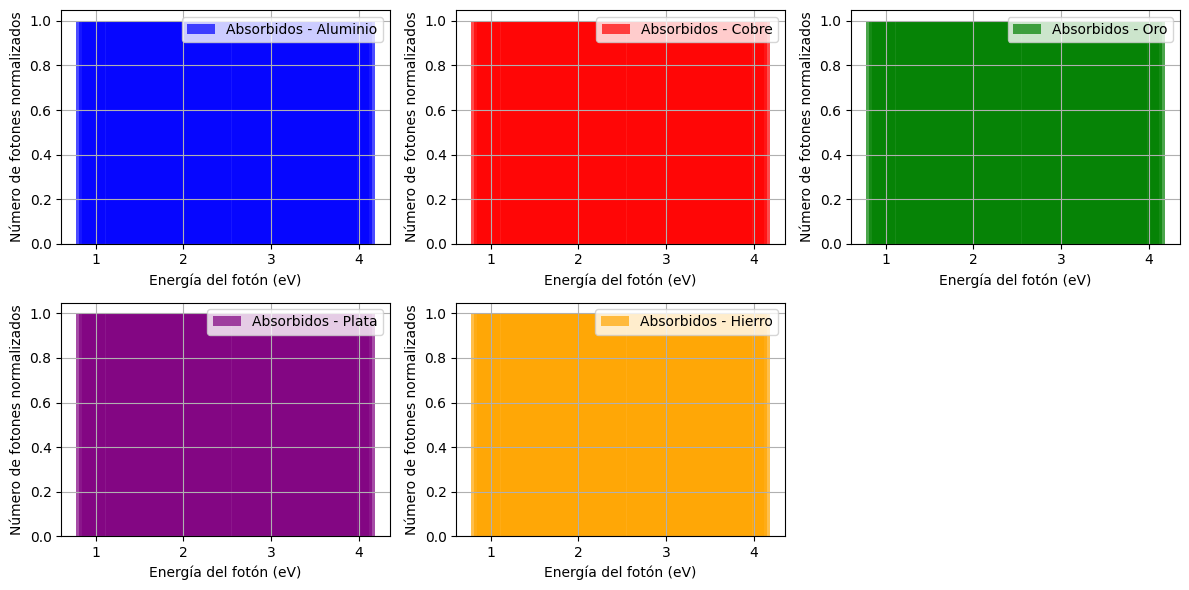

In [49]:
# Graficamos los fotones absorbidos en función de la energía de cada fotón
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

for ax, (metal, valores), color in zip(axes[:len(absorbidos)], absorbidos.items(), colores):
    ax.bar(energias_foton, valores, width=0.1, color=color, alpha=0.7, label=f"Absorbidos - {metal}")
    ax.set_xlabel("Energía del fotón (eV)")
    ax.set_ylabel("Número de fotones normalizados")
    ax.legend()
    ax.grid()
for ax in axes[len(absorbidos):]:  # Elimina el subplot vacío
    fig.delaxes(ax)
plt.tight_layout()
plt.savefig("Caso2_fotones-absorbidos", dpi=500) # Descargamos las graficas
plt.show()

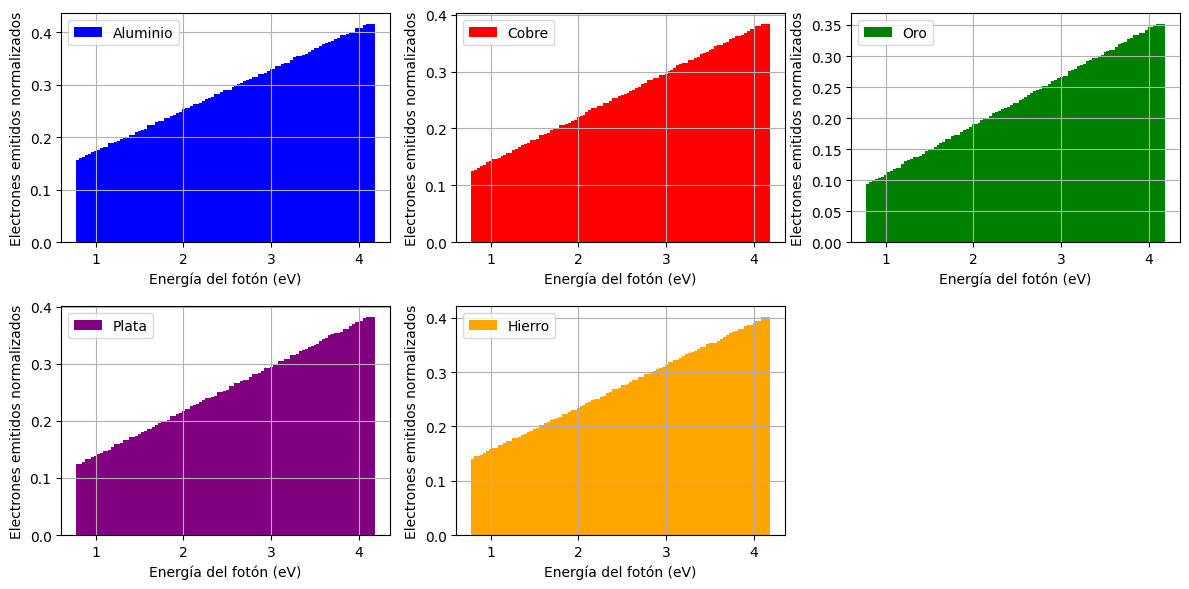

In [50]:
# Graficamos los electrones emitidos en función de la energía del fotón

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()  # Convertir a una lista para indexar fácilmente

for ax, (metal, electrones), color in zip(axes[:len(resultados)], resultados.items(), colores):
    ax.bar(energias_foton, electrones, width=0.1, color=color, label=metal)
    ax.set_xlabel("Energía del fotón (eV)")
    ax.set_ylabel("Electrones emitidos normalizados")
    ax.legend()
    ax.grid()
for ax in axes[len(resultados):]:   # Elimina el subplot vacío
    fig.delaxes(ax)
plt.tight_layout()
plt.savefig("Caso2_electrones-emitidos", dpi=500) # Descargamos las graficas
plt.show()

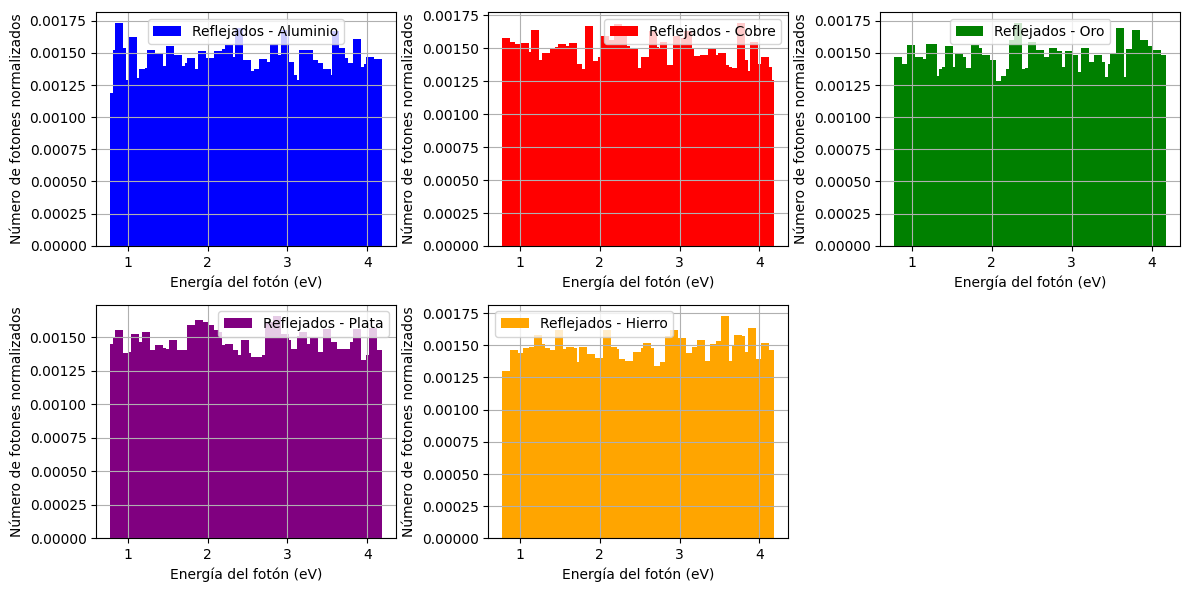

In [51]:
# Graficamos los fotones reflejados en función de la energía de cada fotón
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

for ax, (metal, valores), color in zip(axes[:len(reflejados)], reflejados.items(), colores):
    ax.bar(energias_foton, valores, width=0.1, color=color, label=f"Reflejados - {metal}")
    ax.set_xlabel("Energía del fotón (eV)")
    ax.set_ylabel("Número de fotones normalizados")
    ax.legend()
    ax.grid()

for ax in axes[len(reflejados):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.savefig("Caso2_fotones-reflejados", dpi=500) # Descargamos las graficas
plt.show()

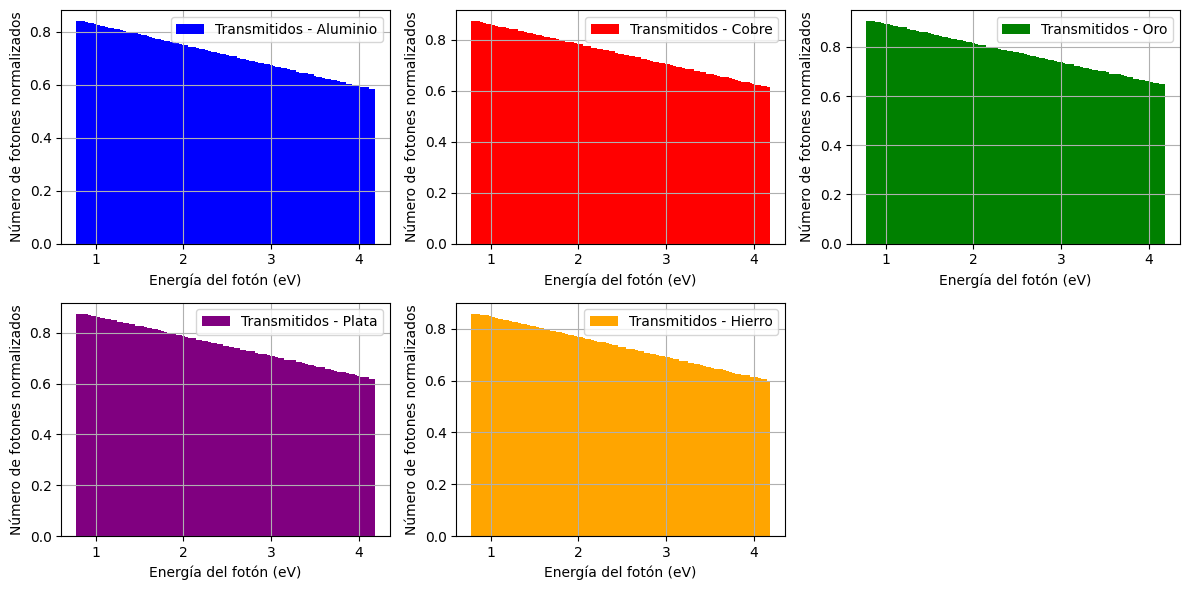

In [52]:
# Graficamos los fotones transmitidos en función de la energía de cada fotón
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

for ax, (metal, valores), color in zip(axes[:len(transmitidos)], transmitidos.items(), colores):
    ax.bar(energias_foton, valores, width=0.1, color=color, label=f"Transmitidos - {metal}")
    ax.set_xlabel("Energía del fotón (eV)")
    ax.set_ylabel("Número de fotones normalizados")
    ax.legend()
    ax.grid()
for ax in axes[len(transmitidos):]:  # Elimina el subplot vacío
    fig.delaxes(ax)
plt.tight_layout()
plt.savefig("Caso2_fotones-trasnmitidos", dpi=500) # Descargamos las graficas
plt.show()